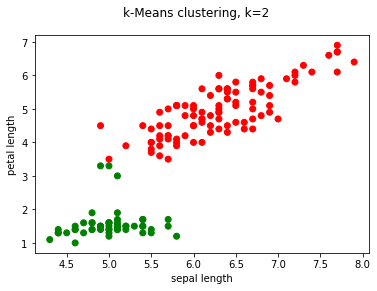

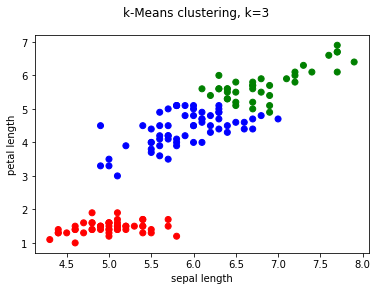

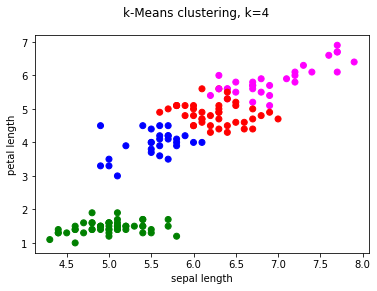

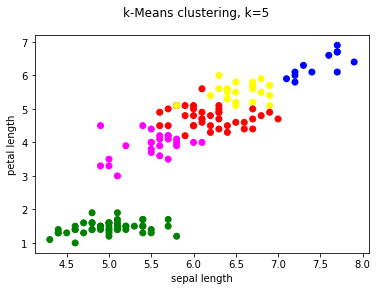

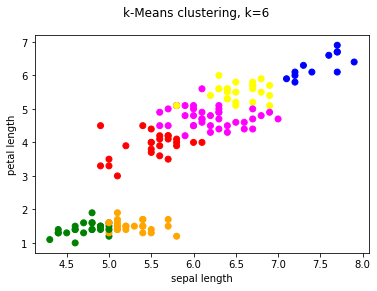

가장 적합한 n_cluster 값 : 3


,k = 2,k = 3,k = 4,k = 5,k = 6
0,0.539922,0.730238,0.634905,0.607896,0.445349


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import adjusted_rand_score

datas = pd.read_csv('lab8_test.csv', index_col=-1)
labels = datas.index

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

ARI = []
for k in range(2, 7):
    model = cluster.KMeans(n_clusters=k)
    model.fit(datas)
    predict = model.predict(datas)
    
    colors = np.array(['red', 'green', 'blue', 'magenta', 'yellow', 'orange'])
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(datas.iloc[:, 0], datas.iloc[:, 2], color=colors[predict])
    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.show()

    ARI.append(adjusted_rand_score(predict, labels))
    
print('가장 적합한 n_cluster 값 :', np.argmax(ARI)+2)
df = pd.DataFrame(columns=['k = 2', 'k = 3', 'k = 4', 'k = 5', 'k = 6'])
df.loc[0] = ARI
df # 각 k에 해당하는 ARI 값 출력